In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
cols=['longitude','latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households','median_income','median_housing_value','ocean_proximity']

housing = pd.read_csv("housing.csv")

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
feature_cols=['longitude','latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households','median_income','median_housing_value']

In [3]:
X= housing.drop("ocean_proximity", axis=1)
y = housing.ocean_proximity

In [10]:
X.columns
y

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [11]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
tree = DecisionTreeClassifier()
tree=tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9738372093023255


In [52]:
pip install pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24657 sha256=3d2be8a17e559a7c0af8702b7792661b2819b91e21c014a4fd57e332971fb58b
  Stored in directory: c:\users\reyyan saeed\appdata\local\pip\cache\wheels\69\b2\67\08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'pydotplus' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pydotplus'. Discussion can be found at https://github.com/pypa/pip/issues/6334


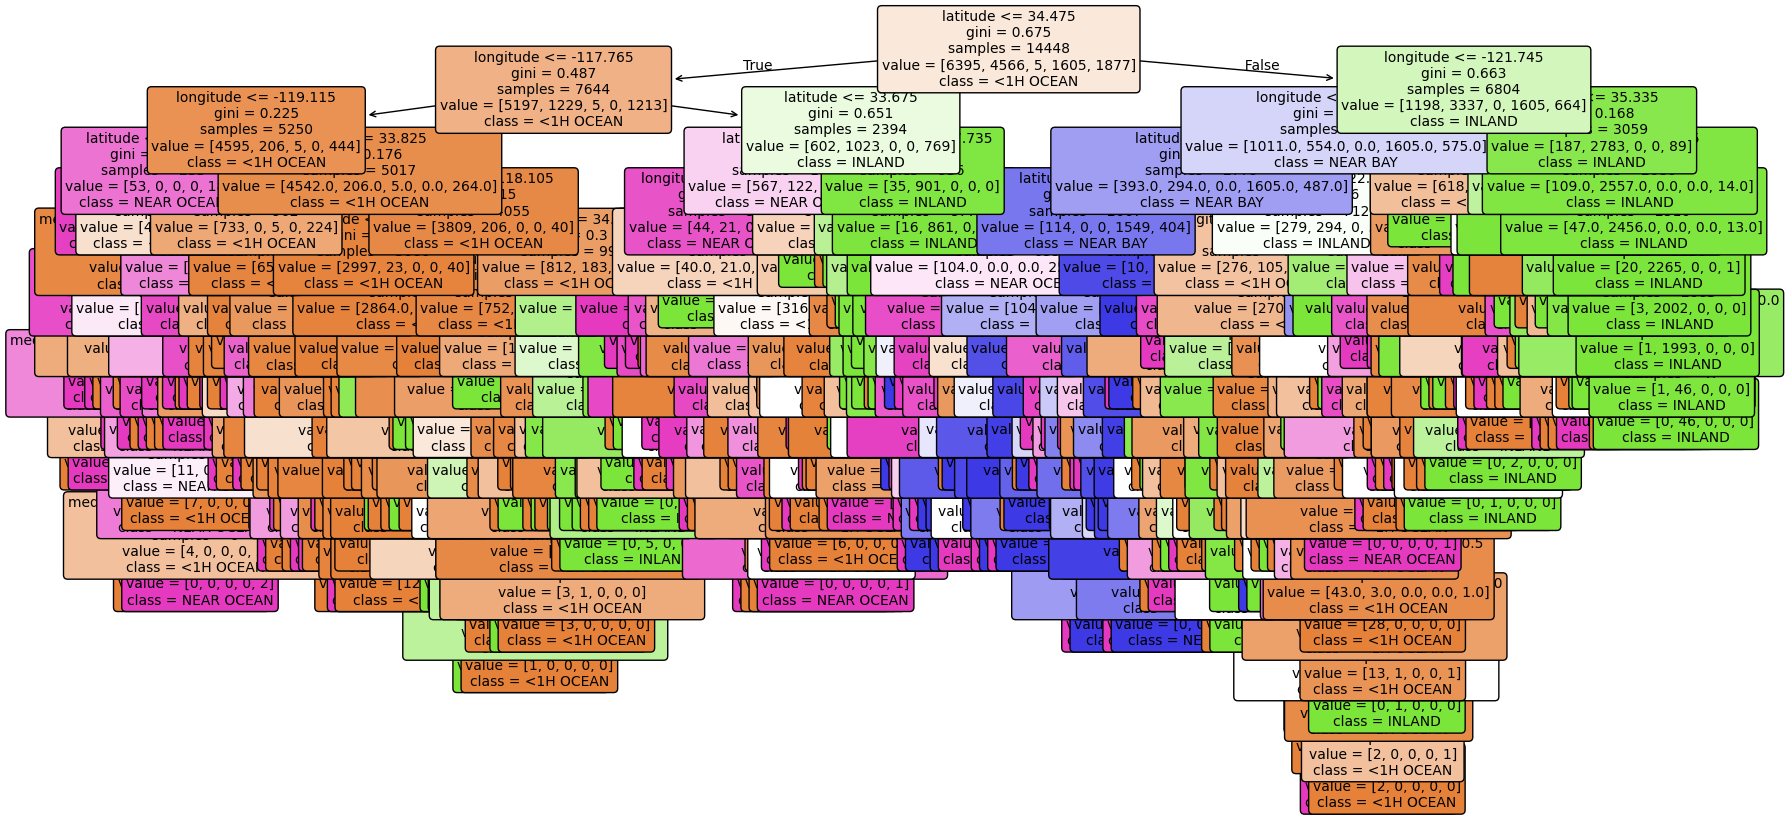

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=feature_cols, 
          class_names=[str(cls) for cls in tree.classes_],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

In [10]:
tree2 = DecisionTreeClassifier(criterion='log_loss',max_depth=3)
tree2=tree2.fit(X_train, y_train)

y_pred = tree2.predict(X_test)


In [11]:
y_train_pred = tree2.predict(X_train)
y_val_pred = tree2.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_test, y_val_pred)

train_error = 1 - train_accuracy
val_error = 1 - val_accuracy

print(f"Training Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")

Training Error: 0.0000
Validation Error: 0.0262


In [12]:
accuracy2=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of Tree with Depth 3:", accuracy2)

Accuracy of Tree with Depth 3: 0.7666343669250646


In [6]:
tree3 = DecisionTreeClassifier(criterion='log_loss',max_depth=6)
tree3=tree3.fit(X_train, y_train)

y_pred = tree3.predict(X_test)

In [7]:
y_train_pred = tree3.predict(X_train)
y_val_pred = tree3.predict(X_test)

In [9]:
accuracy3=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of Tree with Depth 6:", accuracy3)

Accuracy of Tree with Depth 6: 0.9161821705426356
